# Cinemática Inversa

In [72]:
%matplotlib notebook
from matplotlib.pyplot import figure, style
from matplotlib.patches import Circle
style.use('ggplot')

from numpy import sin, cos, pi, arctan2

<IPython.core.display.Javascript object>


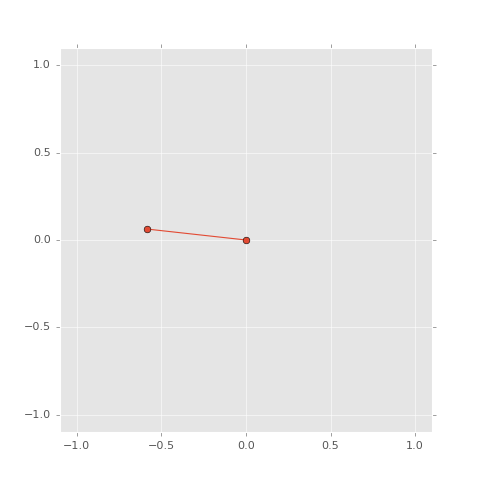

In [75]:
fig = figure(figsize=(6, 6))
ax = fig.add_subplot(111)

p1, = ax.plot([0, 1], [0, 1], '-o')

ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

def onclick(event):
    p1.set_data([0, event.xdata], [0, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [55]:
l = 1
τ = 2*pi

<IPython.core.display.Javascript object>


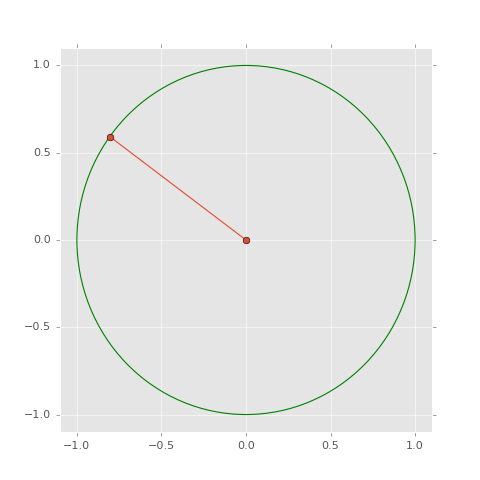

In [76]:
fig = figure(figsize=(6, 6))
ax = fig.add_subplot(111)

p1, = ax.plot([0, l*cos(τ/8)], [0, l*sin(τ/8)], '-o')

circulo = Circle([0, 0], l, lw=1, ec='g')
circulo.set_fill(False)
ax.add_patch(circulo)

ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

def onclick(event):
    p1.set_data([0, event.xdata], [0, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


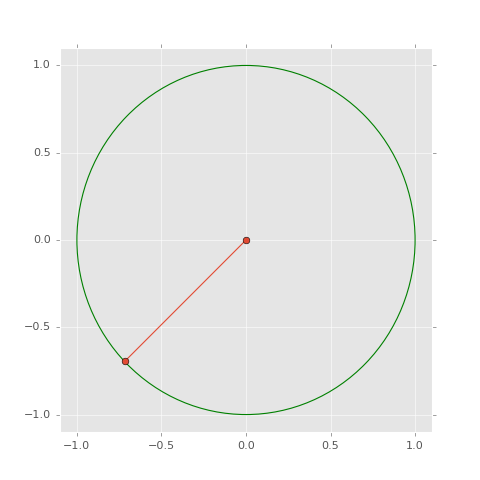

In [77]:
fig = figure(figsize=(6, 6))
ax = fig.add_subplot(111)

p1, = ax.plot([0, l*cos(τ/8)], [0, l*sin(τ/8)], '-o')

circulo = Circle([0, 0], l, lw=1, ec='g')
circulo.set_fill(False)
ax.add_patch(circulo)

ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

def onclick(event):
    θ = arctan2(event.ydata, event.xdata)
    p1.set_data([0, l*cos(θ)], [0, l*sin(θ)])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

En esta práctica aprenderemos a desplegar visualmente todos los elementos de la cinemática directa, para lo cual nos hace falta revisar la visualización de los ejes coordenados; para esto usaremos la función `quiver` de matplotlib.

In [ ]:
%matplotlib notebook
from matplotlib.pyplot import figure, plot, style
from mpl_toolkits.mplot3d import Axes3D
style.use("ggplot")

Empezaremos desplegando los ejes coordenados en el origen de nuestra gráfica, la cual tiene una posición, y orientación de cada eje coordenado:

In [ ]:
o = [0, 0, 0]

i = [1, 0, 0]
j = [0, 1, 0]
k = [0, 0, 1]

Para poder crear las flechas mecesarias, tenemos que vaciar los elementos de estos arreglos, separandolos en componentes en $x$, $y$ y $z$ de su origen, asi como la dirección en la que apuntan $u$, $v$, $w$:

In [ ]:
xs, ys, zs = zip(o, o, o)
us, vs, ws = zip(i, j, k)

Si utilizamos estos arreglos para graficar los elementos, tendremos lo siguiente:

In [ ]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')

a1.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=0.5)

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-2.1, 2.1);

Lo cual se ve prefectamente bien como eje coordenado, de no ser porque no sabemos cual dirección es $x$, cual $y$ y cual $z$, para esto utilizaremos colores, si separamos cada eje coordenado en una llamada a `quiver` tendremos que a cada uno podemos darle un color diferente, escogeremos azul para $x$, verde para $y$ y rojo para $z$:

In [ ]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')

xs, ys, zs = zip(o)
us, vs, ws = zip(i)
a1.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=0.5, color='b')

xs, ys, zs = zip(o)
us, vs, ws = zip(j)
a1.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=0.5, color='g')

xs, ys, zs = zip(o)
us, vs, ws = zip(k)
a1.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=0.5, color='r')

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-2.1, 2.1);

Sin embargo el código es demasiado largo para ser legible en una pasada, podemos meter todos los calculos y llamadas a quiver en una función lo cual nos ayudará a poder usarlo en multiples ocasiones:

In [ ]:
def ejes(axis, origen, long=0.5):
    
    i = [1, 0, 0]
    j = [0, 1, 0]
    k = [0, 0, 1]
    
    xs, ys, zs = zip(origen)
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='b')

    xs, ys, zs = zip(origen)
    us, vs, ws = zip(j)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='g')

    xs, ys, zs = zip(origen)
    us, vs, ws = zip(k)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='r')

Si ahora grafico llamando esta función dos veces para graficar dos grupos de ejes coordenados, tendremos:

In [ ]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')

ejes(a1, [0, 0, 0], 0.5)
ejes(a1, [1, 1, 1], 0.8)

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-2.1, 2.1);

Aqui podrás notar que los ejes coordenados se graficaron correctamente, pero no hemos hecho nada para tomar en cuenta su orientación, esto lo lograremos usando la matriz de transformación homogénea y revisando la submatriz de rotación.

Primero importemos las funciones necesarias de la libreria `numpy`.

In [ ]:
from numpy import matrix, sin, cos, pi
τ = 2*pi

Definamos una matriz de transformación sencilla para este ejemplo:

In [ ]:
l = 1
θ = τ/12

A1 = matrix([[cos(θ), -sin(θ), 0, l*cos(θ)],
             [sin(θ), cos(θ), 0, l*sin(θ)],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])
A1

De aqui, el ultimo vector columna es la posición del origen a graficar:

In [ ]:
o1 = A1[:3, 3:]
o1

Y la submatriz de $3\times3$ del inicio es la orientación de este

In [ ]:
R1 = A1[:3, :3]
R1

De aqui utilizaremos como la orientación del vector unitario $\hat{i}$ el primer vector columna de esta matriz, la orientación del vector unitario $\hat{j}$ el segundo vector columna y la orientación del vector unitario $\hat{k}$ el tercer vector columna, veamos por ejemplo $\hat{i}$:

In [ ]:
R1[:3, :1].T.tolist()[0]

Una vez resuelto esto, tan solo es cuestion de meterlo en nuestra función de nuevo:

In [ ]:
def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='b')

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='g')

    us, vs, ws = zip(k)
    axis.quiver(xs, ys, zs, us, vs, ws, pivot='tail', length=long, color='r')

Y para terminar este ejemplo, graficaremos tanto la posición origen, como la primer articulación que nos encontramos despues de esta matriz de transformación $A_1$:

In [ ]:
from numpy import eye

In [ ]:
o0 = matrix([[0],[0],[0]])
o0

In [ ]:
R0 = eye(3)
R0

In [ ]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')

ejes(a1, o0, R0, 0.5)
ejes(a1, o1, R1, 0.5)

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-2.1, 2.1);

Si ahora graficamos una linea que representa el eslabon entre estas articulaciones, tendremos:

In [ ]:
xs = [o0.item(0), o1.item(0)]
ys = [o0.item(1), o1.item(1)]
zs = [o0.item(2), o1.item(2)]

In [ ]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')

ejes(a1, o0, R0, 0.5)
ejes(a1, o1, R1, 0.5)

a1.plot(xs, ys, zs, '-o', lw=10, solid_capstyle='round')

a1.set_xlim(-2.1, 2.1)
a1.set_ylim(-2.1, 2.1)
a1.set_zlim(-2.1, 2.1);

# Ejercicio

![](./imagenes/puma.png)

1. Cree una función que tome como argumentos los parametros de Denavit - Hartenberg y devuelva la matriz de transformación homogénea asociada a cada eslabon.
2. Cree una función que dados los angulos del manipulador Stanford que se ve en la figura, grafique las posiciones de los eslabones, junto con los ejes coordenados asociados a cada articulación.
3. Utilice las funciones interactivas del notebook para crear una visualización interactiva del manipulador desipuesto (recuerde cambiar al ambiente de `matplotlib inline` para esta visualización).